In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-reviews-playstore-daily-update/spotify_reviews.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
import nltk
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv(filepath)

In [5]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973


In [6]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84165 entries, 0 to 84164
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              84165 non-null  object
 1   userName              84161 non-null  object
 2   content               84165 non-null  object
 3   score                 84165 non-null  int64 
 4   thumbsUpCount         84165 non-null  int64 
 5   reviewCreatedVersion  78397 non-null  object
 6   at                    84165 non-null  object
 7   appVersion            78397 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.1+ MB


In [8]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494


In [9]:
df.rename(columns={'thumbsUpCount':'likesOnReview',
        'at':'reviewDate'},inplace=True)

In [10]:
df = df.drop('reviewCreatedVersion',axis=1)

In [11]:
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09 16:26:14,8.9.38.494


In [12]:
df.describe()

,score,likesOnReview
count,84165.000000,84165.000000
mean,2.439696,15.690097
std,1.508838,102.131869
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,4.000000,4.000000
max,5.000000,9781.000000


## fixing username
* removing non alphabetic characters
* lower case

In [13]:
pattern = r'([a-zA-Z]+)'
df['userName'] = df['userName'].str.extract(pattern)

In [14]:
df['userName'] = df['userName'].str.lower()
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,rajib,It's good,4,0,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,mihaela,"I love this app so much, I've been using Spoti...",5,0,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,jonathan,Perfect,5,0,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,cam,Best all around music streaming app I have use...,5,0,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,your,Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09 16:26:14,8.9.38.494


### fixing index
* removed original review id column
* added new review id col

In [15]:
df['reviewId'] =  range(len(df))
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion
0,0,rajib,It's good,4,0,2024-05-09 16:28:13,NaN
1,1,mihaela,"I love this app so much, I've been using Spoti...",5,0,2024-05-09 16:27:18,8.9.38.494
2,2,jonathan,Perfect,5,0,2024-05-09 16:27:03,8.9.36.616
3,3,cam,Best all around music streaming app I have use...,5,0,2024-05-09 16:26:19,8.9.38.494
4,4,your,Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09 16:26:14,8.9.38.494


### checking out score column

In [16]:
df['score'].describe()

count    84165.000000
mean         2.439696
std          1.508838
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: score, dtype: float64

In [17]:
df['score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84165 entries, 0 to 84164
Series name: score
Non-Null Count  Dtype
--------------  -----
84165 non-null  int64
dtypes: int64(1)
memory usage: 657.7 KB


### fixing review date
* converting date to pandas datetime type

In [18]:
df['reviewDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84165 entries, 0 to 84164
Series name: reviewDate
Non-Null Count  Dtype 
--------------  ----- 
84165 non-null  object
dtypes: object(1)
memory usage: 657.7+ KB


In [19]:
df['reviewDate'].describe()

count                   84165
unique                  84083
top       2024-03-13 16:09:44
freq                        2
Name: reviewDate, dtype: object

In [20]:
df['reviewDate'] = df['reviewDate'].astype(str)
#df['reviewDate'] = pd.to_datetime(df['reviewDate'])

#### splitting date and time into 2 separate columns


In [21]:
df['reviewTime'] = df['reviewDate'].str.split(' ').str[1]
df['reviewDate'] = df['reviewDate'].str.split(' ').str[0]

In [22]:
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion,reviewTime
0,0,rajib,It's good,4,0,2024-05-09,NaN,16:28:13
1,1,mihaela,"I love this app so much, I've been using Spoti...",5,0,2024-05-09,8.9.38.494,16:27:18
2,2,jonathan,Perfect,5,0,2024-05-09,8.9.36.616,16:27:03
3,3,cam,Best all around music streaming app I have use...,5,0,2024-05-09,8.9.38.494,16:26:19
4,4,your,Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09,8.9.38.494,16:26:14


### fixing app version

In [23]:
df['appVersion'] = df['appVersion'].fillna(df['appVersion'].mode()[0])

In [24]:
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion,reviewTime
0,0,rajib,It's good,4,0,2024-05-09,8.8.96.364,16:28:13
1,1,mihaela,"I love this app so much, I've been using Spoti...",5,0,2024-05-09,8.9.38.494,16:27:18
2,2,jonathan,Perfect,5,0,2024-05-09,8.9.36.616,16:27:03
3,3,cam,Best all around music streaming app I have use...,5,0,2024-05-09,8.9.38.494,16:26:19
4,4,your,Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09,8.9.38.494,16:26:14


## dealing with outliers
    

In [25]:
grouped = df.groupby(by='userName')['reviewId'].count().sort_values(ascending=False)
grouped

userName
a             12786
david           436
john            398
michael         397
james           319
              ...  
itme              1
itmareli          1
itit              1
itisdarren        1
zzz               1
Name: reviewId, Length: 24266, dtype: int64

#### removing partial outlier while retaining review of the outlier in a sep var

In [26]:
bins = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
categories = pd.cut(grouped, bins = bins, labels =labels)
bin_counts = categories.value_counts(sort = False)
print(bin_counts)

reviewId
0-1        17995
1-2         2493
2-3         1003
3-4          573
4-5          369
5-10         863
10-20        486
20-30        203
30-40         68
40-50         49
50-100        98
100-200       53
200-300        7
300-400        4
400-500        1
Name: count, dtype: int64


In [27]:
userReviews = df['content']

### the outliers are too high in number so before proceeding to remove/deal with them we will attempt to understand the review content of the users who post high number of reviews

## Understanding Reviews

In [28]:
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion,reviewTime
0,0,rajib,It's good,4,0,2024-05-09,8.8.96.364,16:28:13
1,1,mihaela,"I love this app so much, I've been using Spoti...",5,0,2024-05-09,8.9.38.494,16:27:18
2,2,jonathan,Perfect,5,0,2024-05-09,8.9.36.616,16:27:03
3,3,cam,Best all around music streaming app I have use...,5,0,2024-05-09,8.9.38.494,16:26:19
4,4,your,Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09,8.9.38.494,16:26:14


In [29]:
reviews = df['content']

In [30]:
import statistics

reviewsByWord = [i.split(" ") for i in reviews]
reviewLengthByWord = [len(i) for i in reviewsByWord]
averageLength = sum(reviewLengthByWord) / len(reviewLengthByWord)
medianLength = statistics.median(reviewLengthByWord)
modeLength = statistics.mode(reviewLengthByWord)
maxLength = max(reviewLengthByWord)
minLength = min(reviewLengthByWord)

print('Average length of reviews is ',averageLength)
print('Median length of reviews is ',medianLength)
print('Mode of reviews is ',modeLength)
print('Max length of reviews is ',maxLength)
print('Min length of reviews is ',minLength)

Average length of reviews is  58.95274757915998
Median length of reviews is  60
Mode of reviews is  58
Max length of reviews is  474
Min length of reviews is  1


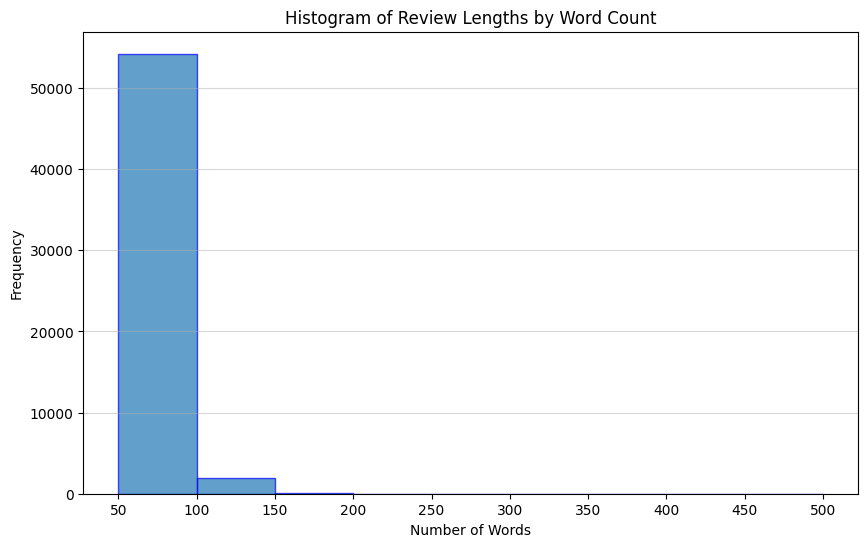

In [31]:
plt.figure(figsize=(10, 6))
bins = [50,100,150,200,250,300,350,400,450,500]
plt.hist(reviewLengthByWord, bins=bins, edgecolor='blue', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths by Word Count')
plt.xticks(bins)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

#### above graph is not an accurate representation of content as we havent taken into account the usage of stopwords, we will use NLTK library to stopwords and filler words

In [32]:
stopWords = set(stopwords.words('english'))

def remove_stopwords(review):
    filtered_words = [word for word in review if word.lower() not in stopWords]
    return filtered_words

# Remove stopwords from each review
reviews_without_stopwords = [remove_stopwords(review) for review in reviewsByWord]
df['ContentWithoutStopwords'] = reviews_without_stopwords

#bagOfWords = ' '.join(reviews_without_stopwords)
#print(len(bagOfWords))

In [33]:
review_lengths = [len(review) for review in reviews_without_stopwords]


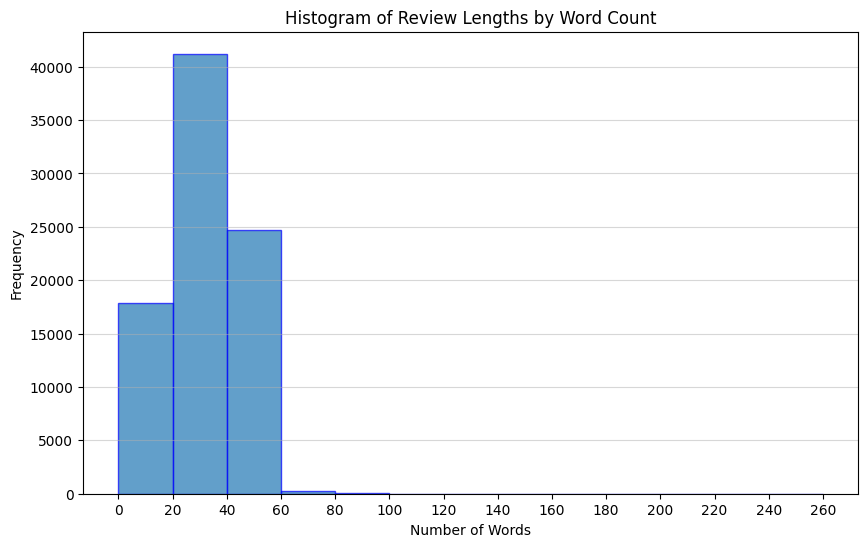

In [34]:
max_length = max(review_lengths)
bins = range(0, max_length+2,20)  # Adjust bin width as needed

plt.figure(figsize=(10, 6))
#bins = [50,100,150,200,250,300,350,400,450,500]
plt.hist(review_lengths, bins=bins, edgecolor='blue', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths by Word Count')
plt.xticks(bins)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

### Finding correlation between review length and review score

In [35]:
df.head()

,reviewId,userName,content,score,likesOnReview,reviewDate,appVersion,reviewTime,ContentWithoutStopwords
0,0,rajib,It's good,4,0,2024-05-09,8.8.96.364,16:28:13,[good]
1,1,mihaela,"I love this app so much, I've been using Spoti...",5,0,2024-05-09,8.9.38.494,16:27:18,"[love, app, much,, I've, using, Spotify, 2, ye..."
2,2,jonathan,Perfect,5,0,2024-05-09,8.9.36.616,16:27:03,[Perfect]
3,3,cam,Best all around music streaming app I have use...,5,0,2024-05-09,8.9.38.494,16:26:19,"[Best, around, music, streaming, app, used,, f..."
4,4,your,Are y'all fr gatekeeping the play button on so...,1,0,2024-05-09,8.9.38.494,16:26:14,"[y'all, fr, gatekeeping, play, button, songs!?]"


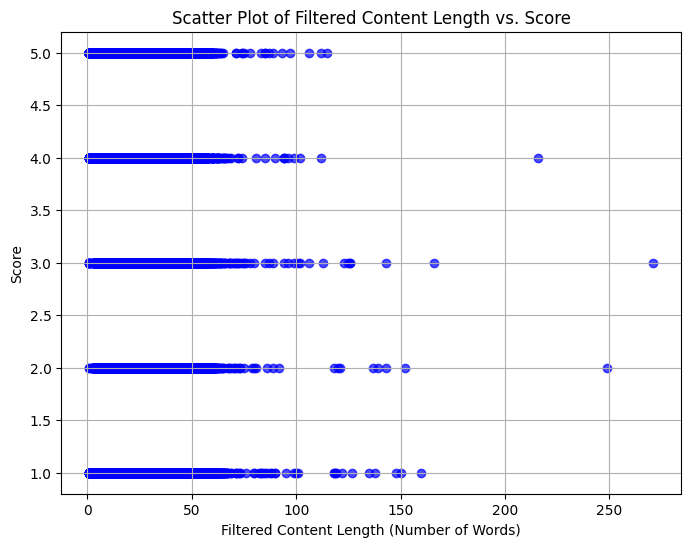

In [36]:
df['filteredContentLength'] = df['ContentWithoutStopwords'].apply(len)

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['filteredContentLength'], df['score'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Filtered Content Length vs. Score')
plt.xlabel('Filtered Content Length (Number of Words)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

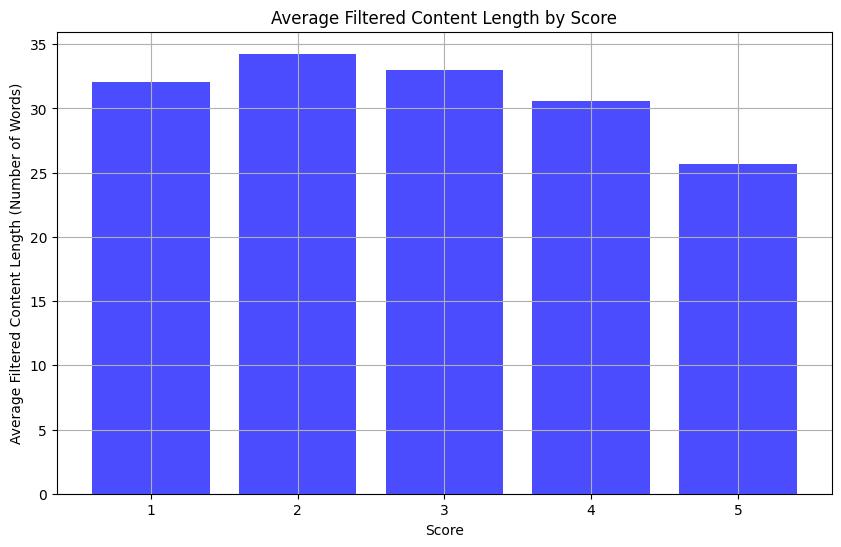

In [37]:
agg_data = df.groupby('score')['filteredContentLength'].mean().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(agg_data['score'], agg_data['filteredContentLength'], color='blue', alpha=0.7)
plt.title('Average Filtered Content Length by Score')
plt.xlabel('Score')
plt.ylabel('Average Filtered Content Length (Number of Words)')
plt.grid(True)
plt.show()

### since higher word count of the reviews are associated with lower rating we can conclude that these are more critical in nature

In [38]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'likesOnReview',
       'reviewDate', 'appVersion', 'reviewTime', 'ContentWithoutStopwords',
       'filteredContentLength'],
      dtype='object')

In [39]:
df['reviewDate'].head()

0    2024-05-09
1    2024-05-09
2    2024-05-09
3    2024-05-09
4    2024-05-09
Name: reviewDate, dtype: object

## Analyzing Review Dynamics

### Analyzing seasonal trends

In [40]:
df['reviewDate'] = pd.to_datetime(df['reviewDate'],format='%Y-%m-%d')
df['reviewMonth'] = df['reviewDate'].dt.strftime('%b')
df['reviewMonth'].head()

0    May
1    May
2    May
3    May
4    May
Name: reviewMonth, dtype: object

### Finding periods of high and low activity by aggregating count of reviews each month

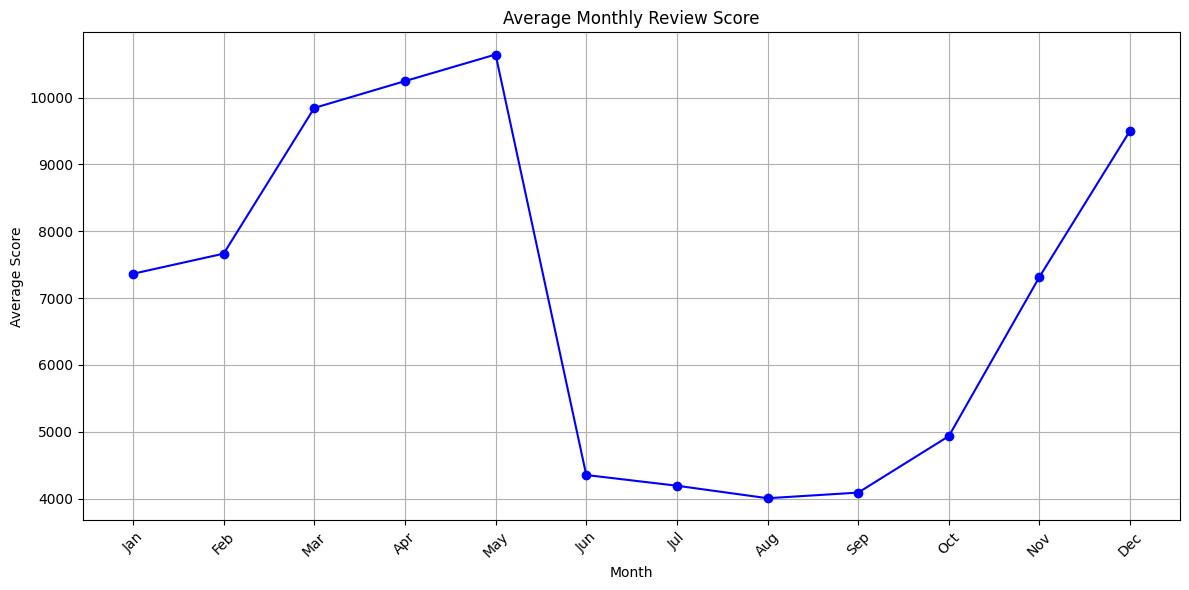

In [41]:
monthlyScore = df.groupby('reviewMonth')['score'].count()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthlyScore = monthlyScore.reindex(month_order)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthlyScore.index, monthlyScore, marker='o', linestyle='-', color='blue')

# Formatting the x-axis
plt.title('Average Monthly Review Score')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Finding user satisfaction per month by aggregating mean of score each month

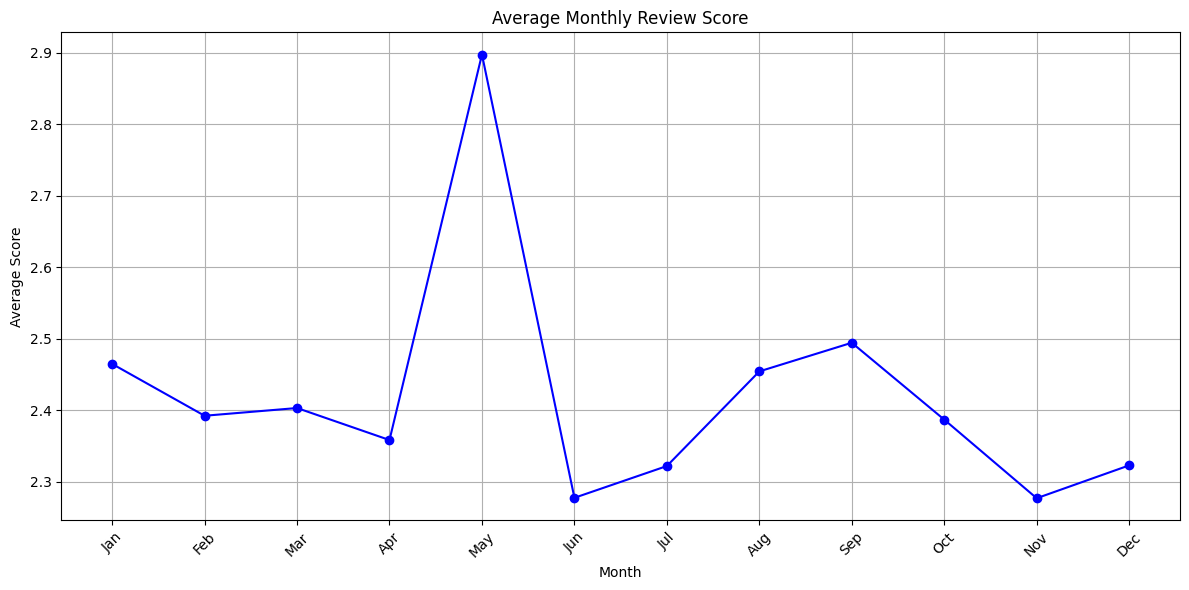

In [42]:
monthlyScore = df.groupby('reviewMonth')['score'].mean()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthlyScore = monthlyScore.reindex(month_order)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthlyScore.index, monthlyScore, marker='o', linestyle='-', color='blue')

# Formatting the x-axis
plt.title('Average Monthly Review Score')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Content Analysis of Reviews

In [43]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'likesOnReview',
       'reviewDate', 'appVersion', 'reviewTime', 'ContentWithoutStopwords',
       'filteredContentLength', 'reviewMonth'],
      dtype='object')

### we will use word cloud to find most used words in the reviews

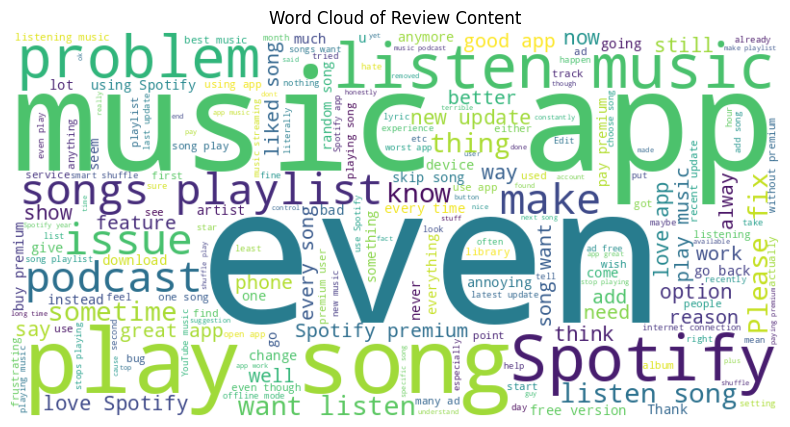

In [44]:
from wordcloud import WordCloud
df['ContentWithoutStopwords'] = df['ContentWithoutStopwords'].apply(lambda x: ' '.join(x))
text = ' '.join(df['ContentWithoutStopwords'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of Review Content')
plt.show()

## Understanding App Version


In [45]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'likesOnReview',
       'reviewDate', 'appVersion', 'reviewTime', 'ContentWithoutStopwords',
       'filteredContentLength', 'reviewMonth'],
      dtype='object')

In [46]:
df['appVersion'].unique()

array(['8.8.96.364', '8.9.38.494', '8.9.36.616', '8.9.10.616',
       '8.9.30.433', '8.9.26.592', '8.7.88.496', '8.9.34.590',
       '8.5.93.445', '8.8.88.397', '8.8.46.529', '8.9.24.633',
       '8.8.66.563', '8.9.14.543', '8.7.28.1217', '8.8.28.409',
       '8.8.36.522', '8.9.8.545', '8.8.58.473', '8.9.32.624',
       '8.8.70.532', '8.8.54.481', '8.8.40.470', '8.7.56.421',
       '8.7.78.373', '8.6.44.851', '8.5.49.973', '8.8.64.554',
       '8.9.4.304', '8.8.48.523', '8.8.22.510', '8.7.62.398',
       '8.6.88.1104', '8.8.68.565', '8.7.36.923', '8.8.94.577',
       '8.7.44.968', '8.8.92.700', '8.8.76.667', '8.9.20.574',
       '8.5.14.752', '8.7.86.422', '8.8.90.893', '8.9.16.593',
       '8.8.72.630', '8.7.54.403', '8.9.22.539', '8.6.20.1063',
       '8.5.25.894', '8.5.83.1075', '8.6.48.796', '8.8.10.582',
       '8.6.60.1126', '8.5.24.762', '8.7.30.1221', '8.8.62.491',
       '8.5.45.620', '8.6.80.1007', '8.8.8.548', '8.8.14.575',
       '8.9.18.512', '8.9.26.583', '8.9.22.531', '8

### finding most positive and negative reviews on which app version

#### creating a new dataframe with columns -  appversion, no.of reviews, mean score, max score and min score

In [47]:
appVersion_df = df.groupby('appVersion').agg(reviewCount=('reviewId','count'),meanRating=('score','mean'), medianRating = ('score','median'),maxRating=('score','max'),minRating=('score','min')).reset_index()
appVersion_df.columns = ['appVersion','reviewCount','meanRating','maxRating','minRating','medianRating']
appVersion_df

,appVersion,reviewCount,meanRating,maxRating,minRating,medianRating
0,1.1.0.113,1,2.000000,2.0,2,2
1,1.2.5.3,3,3.333333,4.0,5,1
2,1.3.0.423,1,1.000000,1.0,1,1
3,1.5.0.739,1,1.000000,1.0,1,1
4,1.8.0.993,2,1.500000,1.5,2,1
...,...,...,...,...,...,...
436,8.9.6.449,7,2.857143,2.0,5,1
437,8.9.6.458,768,2.415365,2.0,5,1
438,8.9.8.417,1,5.000000,5.0,5,5
439,8.9.8.537,10,2.500000,2.0,5,1


In [48]:
tempVersion = appVersion_df['appVersion'].str.split('.')
appVersion_df['version'] = appVersion_df['appVersion'].apply(lambda x: '.'.join(x.split('.')[:2]))
appVersion_df['subVersion'] = appVersion_df['appVersion'].apply(lambda x: '.'.join(x.split('.')[2:]) if len(x.split('.')) > 3 else None)


In [49]:
appVersion_df.head()

,appVersion,reviewCount,meanRating,maxRating,minRating,medianRating,version,subVersion
0,1.1.0.113,1,2.000000,2.0,2,2,1.1,0.113
1,1.2.5.3,3,3.333333,4.0,5,1,1.2,5.3
2,1.3.0.423,1,1.000000,1.0,1,1,1.3,0.423
3,1.5.0.739,1,1.000000,1.0,1,1,1.5,0.739
4,1.8.0.993,2,1.500000,1.5,2,1,1.8,0.993


### finding the app version with highest review count

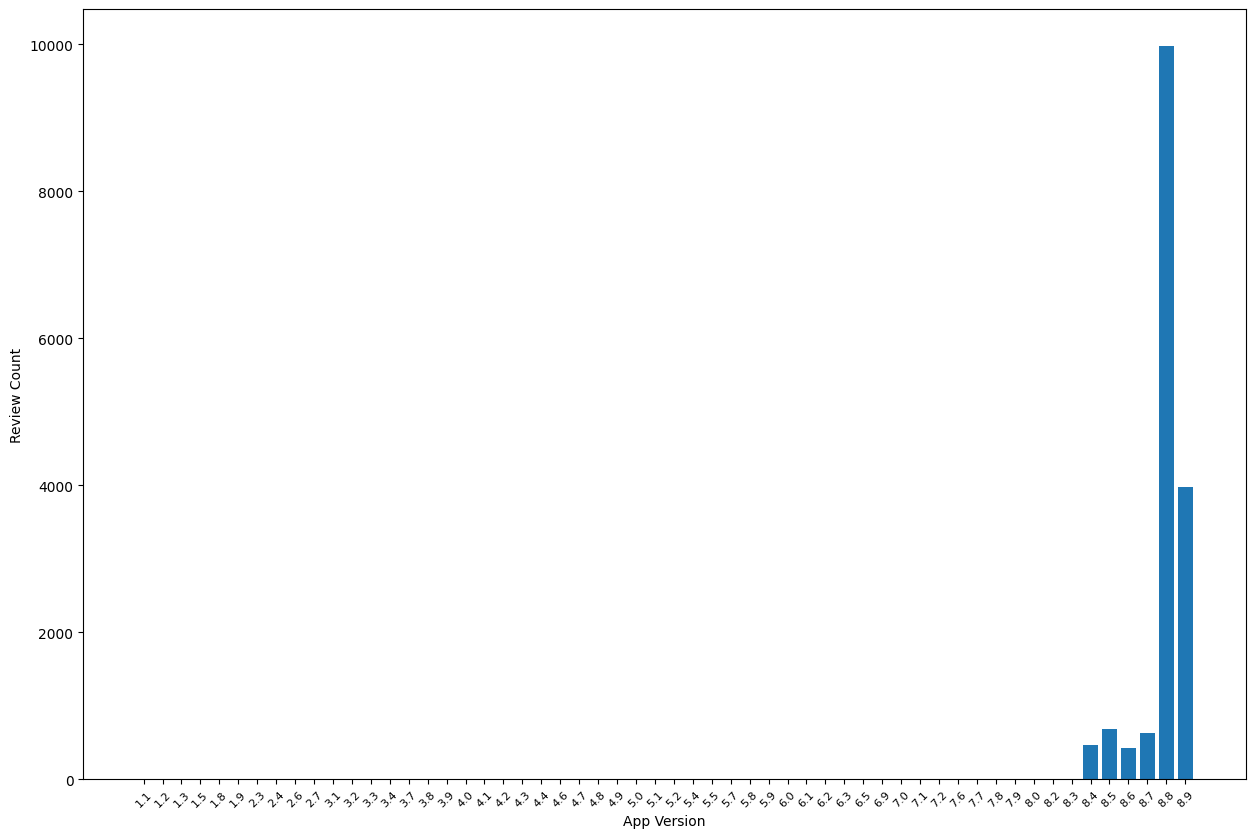

In [50]:
plt.figure(figsize=(15,10))
plt.bar(appVersion_df['version'],appVersion_df['reviewCount'])
plt.xlabel('App Version')
plt.ylabel('Review Count')
plt.xticks(rotation=45,fontsize=8)
plt.show()

### finding the app version with highest mean review score

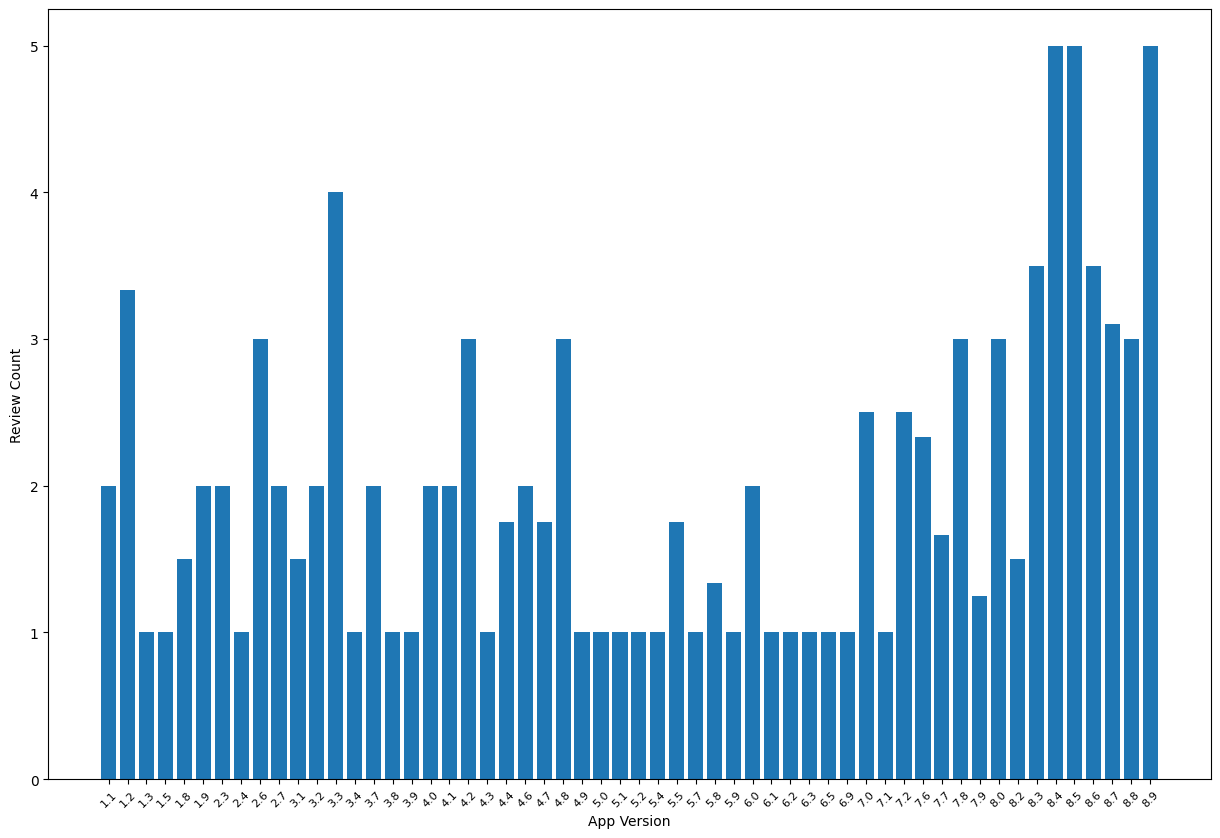

In [51]:
plt.figure(figsize=(15,10))
plt.bar(appVersion_df['version'],appVersion_df['meanRating'])
plt.xlabel('App Version')
plt.ylabel('Review Count')
plt.xticks(rotation=45,fontsize=8)
plt.show()

In [52]:
# #selecting 500 random rows of outliers
# outlier = df[df['userName'] == 'a']
# random_outlier = outlier.sample(n=500)
# dropindices = outlier.index.tolist()
# #print(outlier)

In [53]:
# #dropping outlier rows to merge later
# df.drop(dropindices,inplace=True)
# print(len(df))

In [54]:
# #merging outliers rows with original df
# df = pd.concat([df,random_outlier],axis=0)

In [55]:
# df.head()

# Understanding users

## User Activity:

* How many reviews has each user written (using userName)?
* Are there any particularly active reviewers?


In [56]:
grouped = df.groupby(by='userName')['reviewId'].count().sort_values(ascending=False)
grouped

userName
a             12786
david           436
john            398
michael         397
james           319
              ...  
itme              1
itmareli          1
itit              1
itisdarren        1
zzz               1
Name: reviewId, Length: 24266, dtype: int64

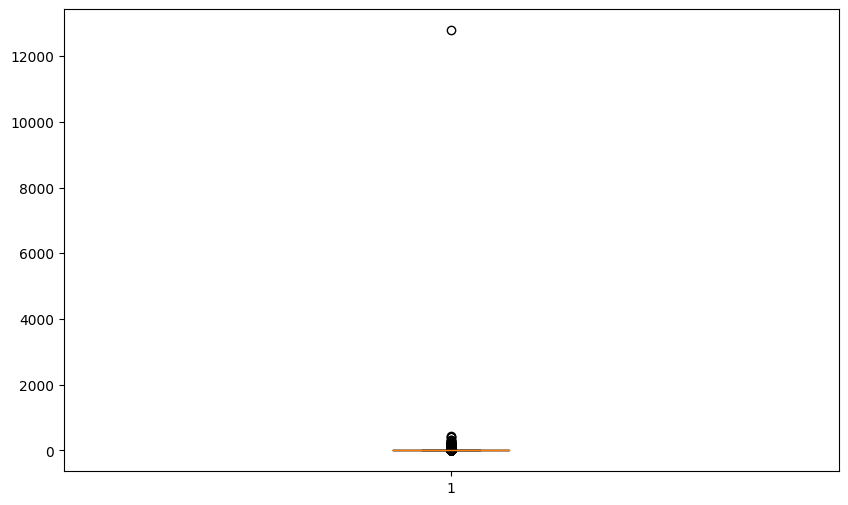

In [57]:
plt.figure(figsize=(10,6))
plt.boxplot(grouped)
plt.show()

In [58]:
grouped.quantile(0.90)


4.0

In [59]:
outliers_90tile = (grouped > 4).count()
print ( 'no of outliers ',(71379-outliers_90tile))
print ( '% of outliers ',((71379-outliers_90tile)*100)/71379)

no of outliers  47113
% of outliers  66.00400678070581


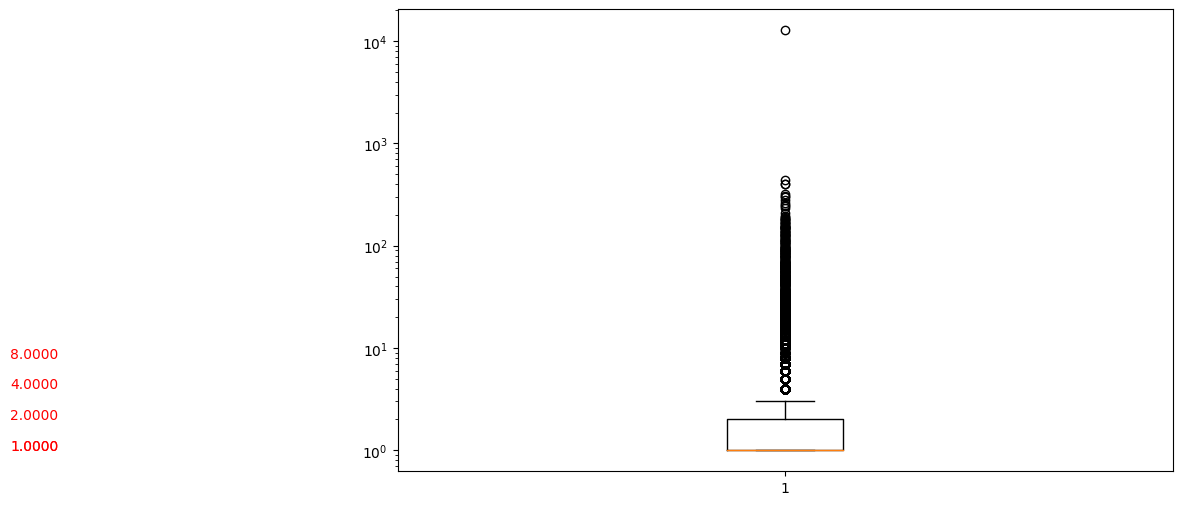

In [60]:
#using log scale due high no of outliers
plt.figure(figsize=(10,6))
plt.boxplot(grouped)
plt.yscale('log')
percentiles = np.percentile(grouped, [25,50,75,90,95])
for percentile in percentiles:
    plt.text(0, percentile, f'{percentile:.4f}', color='red')
plt.show()



#### since too many outliers we categorize based on percentile

In [61]:
grouped_df = grouped.reset_index()
grouped_df.columns = ['userName','reviewCount']
grouped_df.head()

,userName,reviewCount
0,a,12786
1,david,436
2,john,398
3,michael,397
4,james,319


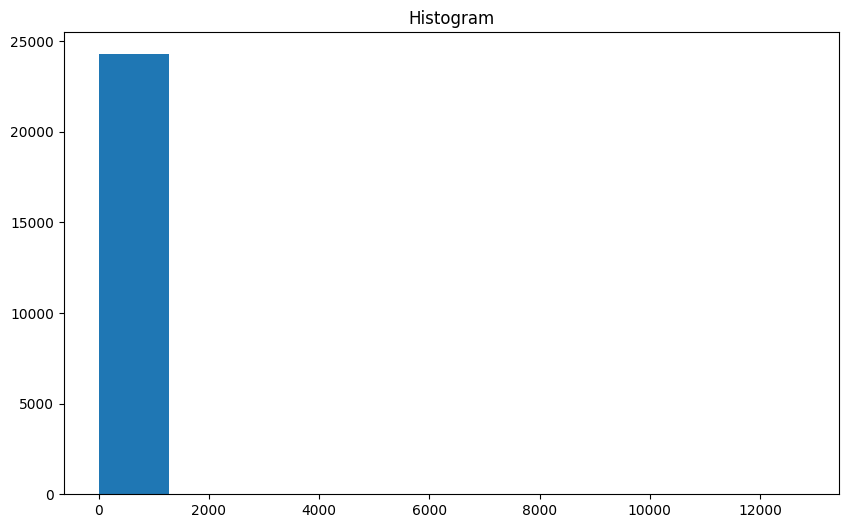

In [62]:
# Violin plot to show density of outliers too
plt.figure(figsize=(10, 6))
plt.hist(grouped,bins=10)
plt.title("Histogram")
plt.show()



#### since we have 66% outliers, removing them would heavily influence the analysis so we will scale the dataset. we will compare square root and log transformations as they perform better with positive skewed data. we wont use winsorization because capping at certain percentile will again heavily influence the accuracy of our analysis, not using box cox to avoid heavy computation

#### log transformation generally used for data which spans over several magnitude
#### square root transformation which is less extreme
#### we will compare both transformed data

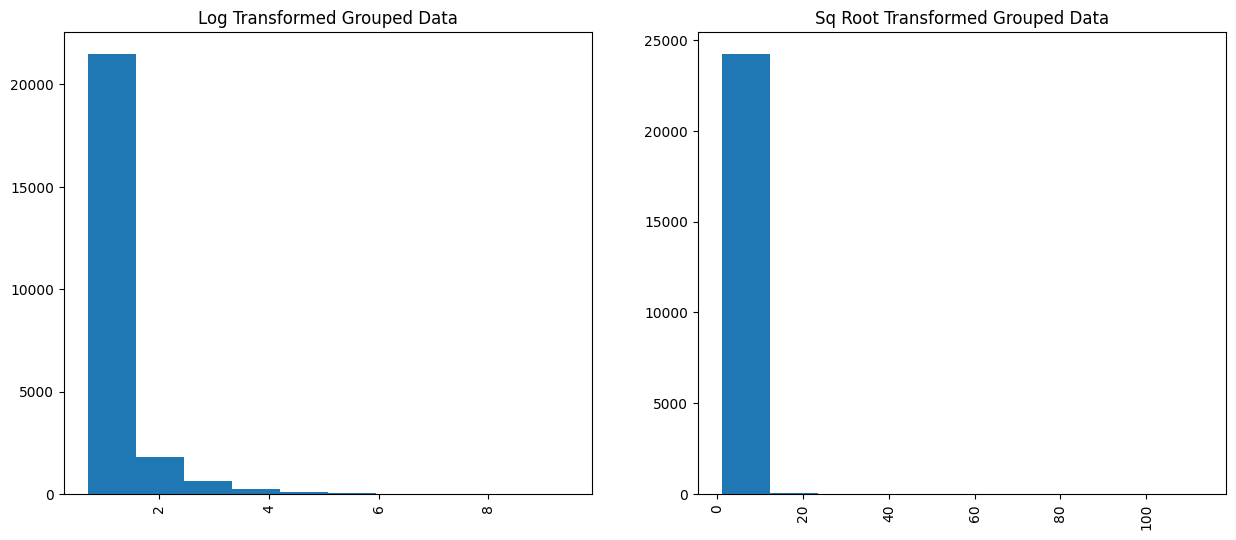

In [63]:
grouped_sqrt = np.sqrt(grouped)
grouped_log = np.log1p(grouped)

# Visualize original and square root transformed data
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
# Bar plot of original grouped data
plt.hist(grouped_log,bins=10)
plt.xticks(rotation=90)
plt.title('Log Transformed Grouped Data')

plt.subplot(1,2,2)
# Bar plot of original grouped data
plt.hist(grouped_sqrt,bins=10)
plt.xticks(rotation=90)
plt.title('Sq Root Transformed Grouped Data')

plt.show()

#### data is still highly skewed so we removed data above 95%tile

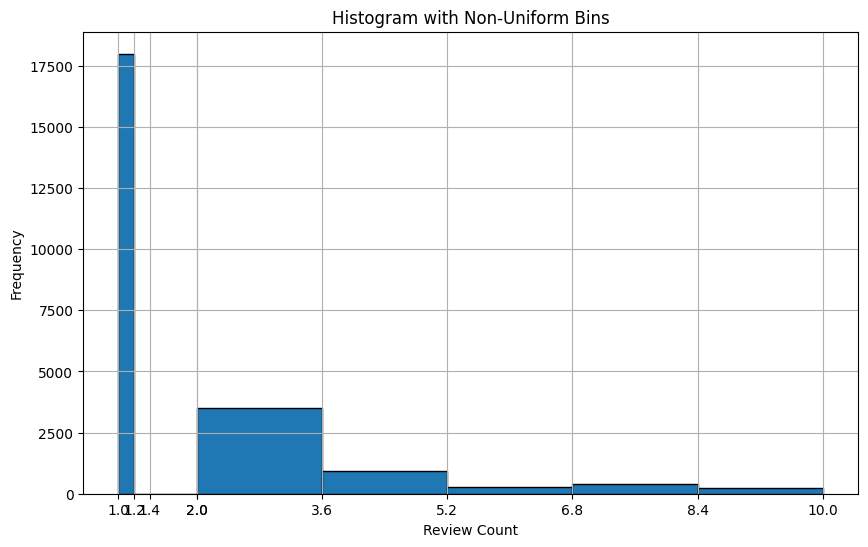

Counts: [17995     0     0     0  3496   942   260   387   216]
Bin Edges: [ 1.   1.2  1.4  2.   2.   3.6  5.2  6.8  8.4 10. ]


In [64]:
custom_bins = [1, 1.2,1.4, 2]
# For uniform bins (totaling 10 bins)
uniform_bins = np.linspace(2, 10, 6)  # 5 bins from 2 to 10

# Concatenate custom and uniform bins
bin_edges = np.concatenate((custom_bins, uniform_bins))

# Compute histogram with custom bins
counts, _ = np.histogram(grouped, bins=bin_edges)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(grouped, bins=bin_edges, edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram with Non-Uniform Bins')
plt.grid(True)
plt.xticks(bin_edges)
plt.show()

# Print counts and bin edges for verification
print("Counts:", counts)
print("Bin Edges:", bin_edges)

retain count of data after removing outliers less than 10%tile: 17995

retain percentage of data after removing outliers less than 10%tile: 74.16%

retain count of data after removing outliers between 10%tile and 20%tile: 0

retain percentage of data after removing outliers between 10%tile and 20%tile: 0.00%

retain count of data after removing outliers between 20%tile and 30%tile: 0

retain percentage of data after removing outliers between 20%tile and 30%tile: 0.00%



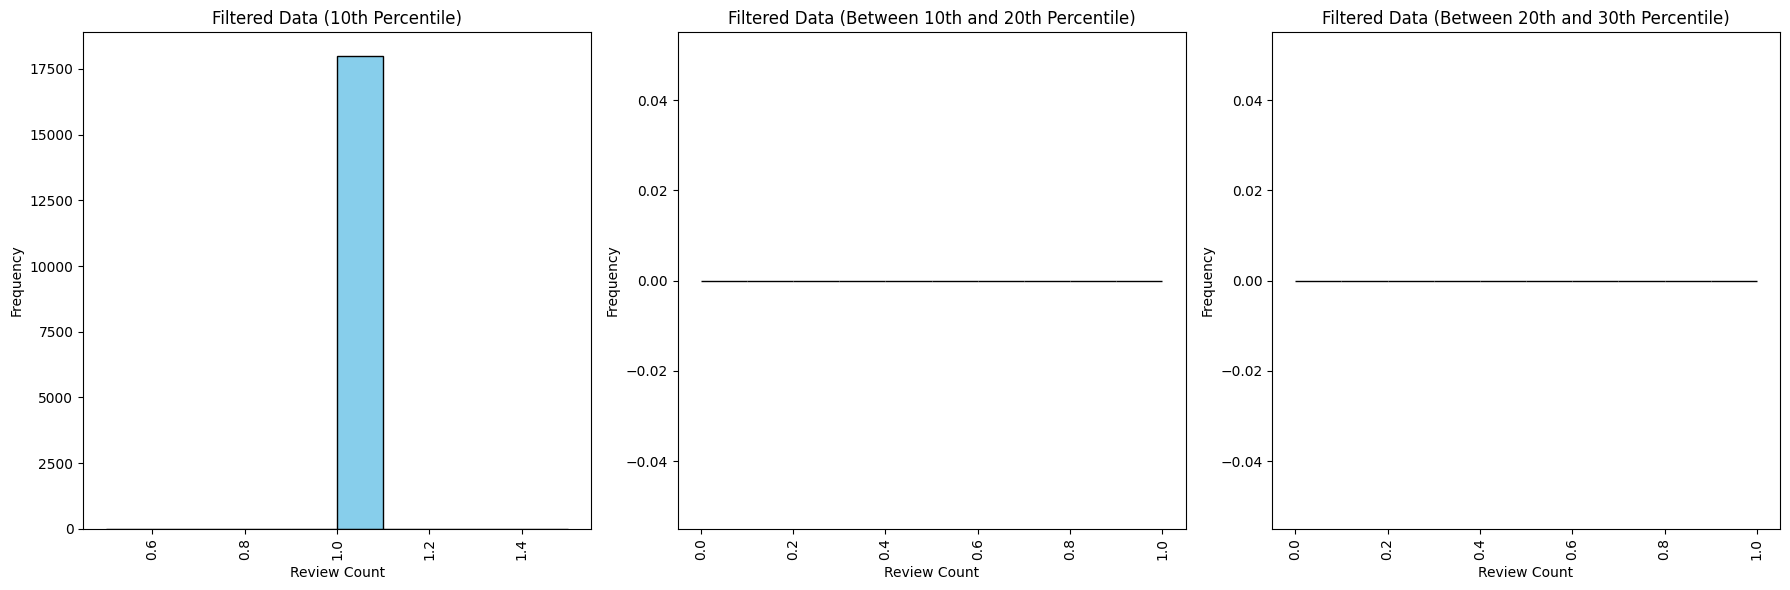

In [65]:
threshold10 = np.percentile(grouped, 10)
threshold20 = np.percentile(grouped, 20)
threshold30 = np.percentile(grouped, 30)

# Filter data based on percentiles
grouped_filtered_10 = grouped[grouped <= threshold10]
retain_percent_10 = (len(grouped_filtered_10) / len(grouped)) * 100

grouped_filtered_20 = grouped[(grouped > threshold10) & (grouped <= threshold20)]
retain_percent_20 = (len(grouped_filtered_20) / len(grouped)) * 100

grouped_filtered_30 = grouped[(grouped > threshold20) & (grouped <= threshold30)]
retain_percent_30 = (len(grouped_filtered_30) / len(grouped)) * 100

# Print results
print(f"retain count of data after removing outliers less than 10%tile: {grouped_filtered_10.count()}\n")
print(f"retain percentage of data after removing outliers less than 10%tile: {retain_percent_10:.2f}%\n")

print(f"retain count of data after removing outliers between 10%tile and 20%tile: {grouped_filtered_20.count()}\n")
print(f"retain percentage of data after removing outliers between 10%tile and 20%tile: {retain_percent_20:.2f}%\n")

print(f"retain count of data after removing outliers between 20%tile and 30%tile: {grouped_filtered_30.count()}\n")
print(f"retain percentage of data after removing outliers between 20%tile and 30%tile: {retain_percent_30:.2f}%\n")

# Plot all histograms in one row
plt.figure(figsize=(18, 6))

# Histogram for 10th percentile
plt.subplot(1, 3, 1)
plt.hist(grouped_filtered_10, bins=10, color='skyblue', edgecolor='black')
plt.title('Filtered Data (10th Percentile)')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Histogram for 20th percentile
plt.subplot(1, 3, 2)
plt.hist(grouped_filtered_20, bins=10, color='lightgreen', edgecolor='black')
plt.title('Filtered Data (Between 10th and 20th Percentile)')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Histogram for 30th percentile
plt.subplot(1, 3, 3)
plt.hist(grouped_filtered_30, bins=10, color='lightcoral', edgecolor='black')
plt.title('Filtered Data (Between 20th and 30th Percentile)')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()